# Back Propagation
Explaination : https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e
https://miro.medium.com/max/585/1*0hf4gLbc-2V5RMXBhluJ_A.gif
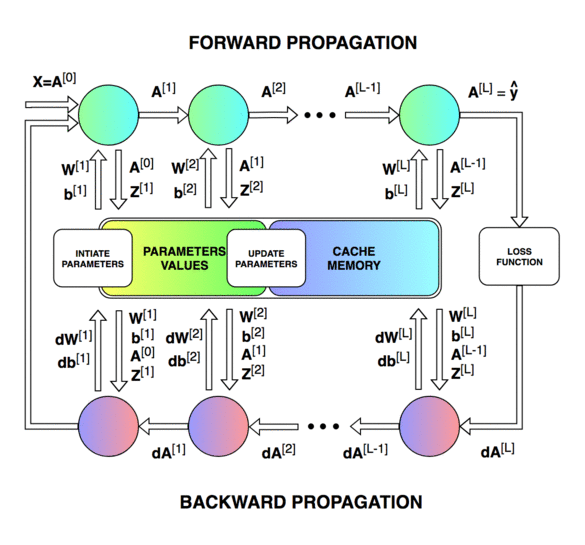

In [1]:
import numpy as np

No Dataset: Values as a Dataset are given manually
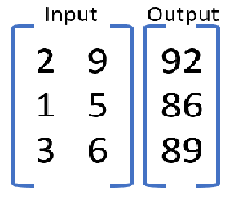

In [2]:
X=np.array(([2,9],[1,5],[3,6]),dtype=float) #input 2-D array as floating numbers
y=np.array(([92],[86],[89]),dtype=float) #output 1-D array as floating numbers

print("X:",X)
print("y:",y)

X: [[2. 9.]
 [1. 5.]
 [3. 6.]]
y: [[92.]
 [86.]
 [89.]]


In [3]:
X=X/np.amax(X,axis=0) 
# np.amax(array, axis) gives the max element along the vertical axis i.e. every col if axis = 0 
# np.argmax(array, axis) gives the max elemnet's index along the vertical axis i.e. every col if axis = 0
# this step is Normalisation: makes every value within range 0 to 1 due to dividing by max value
y=y/100
# y is also normalised but the denominator is set 100 (human instinct)

In [4]:
print("X:",X)
print("y:",y)

X: [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
y: [[0.92]
 [0.86]
 [0.89]]


In [5]:
def sigmoid(x):
    # to calculate the sigmoid of a value
    # this is th eactivation function that give the output for that particular node 
    # https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
    return 1/(1+np.exp(-x))


Sigmoid function to calculate the whether 0 or 1
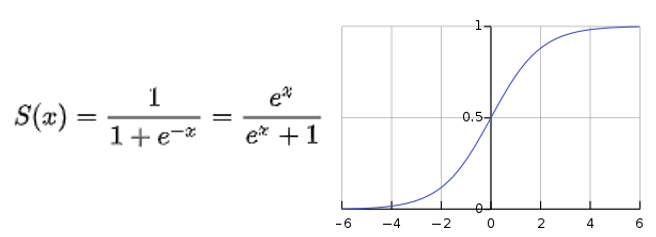

In [6]:
def sigmoid_grad(x):
    # calculates the derivative of the sigmoid function
    # derivative is found to find the best fit of weights by matching this value and back-propagating
    return x*(1-x)


In [7]:
epoch=1000
eta=0.2
input_neurons=2
hidden_neurons=2
output_neurons=2

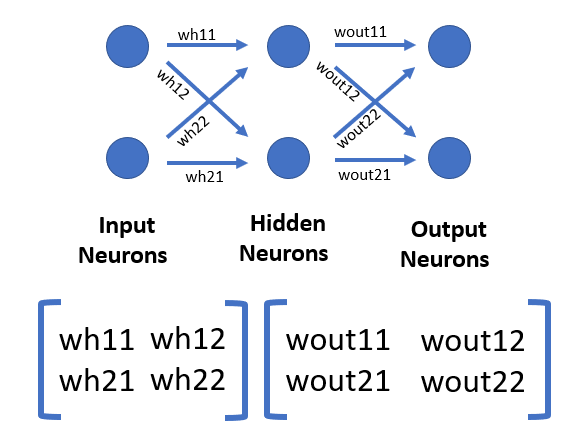

bh and bout are 1-D arrays containing constants to help chart all possible fits in the hypothesis space

In [8]:
wh=np.random.uniform(size=(input_neurons,hidden_neurons)) #creating a matrix (2,2) of random weights 
bh=np.random.uniform(size=(1,hidden_neurons)) #creating a matrix (1,2) of random constants 
wout=np.random.uniform(size=(hidden_neurons,output_neurons)) #creating a matrix (2,2) of random weights 
bout=np.random.uniform(size=(1,output_neurons)) #creating a matrix (2,2) of random constants

In [9]:
for i in range(epoch):
    h_ip=np.dot(X,wh)+bh # rows of sums ( products (row elements of input and  column elements of hidden)) + column
    h_act=sigmoid(h_ip)
    
    o_ip=np.dot(h_act,wout)+bout # rows of sums ( products (row elements of input and  column elements of output)) + column
    output=sigmoid(o_ip)
    
    Eo=y-output # loss or error function
    outgrad=sigmoid_grad(output) # derivative of output as gradient
    d_output=Eo*outgrad # value to backpropagate
    
    Eh=d_output.dot(wout.T) # multiply wh weights with value backpropagated from the output layer
    hiddengrad=sigmoid_grad(h_act) # derivative of weights as gradient
    d_hidden=Eh*hiddengrad # value to backpropagate
    
    wout +=h_act.T.dot(d_output)*eta # update weights
    wh+=X.T.dot(d_hidden)*eta # update weights

In [10]:
print("Normalized Input:\n"+str(X))
print("Actual Output:\n"+str(y))
print("Predicted Output:\n",output)


Normalized Input:
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output:
[[0.92]
 [0.86]
 [0.89]]
Predicted Output:
 [[0.89400075 0.89460323]
 [0.88242899 0.8798366 ]
 [0.89423167 0.89569774]]
